In [ ]:
!pip install opendatasets
!pip install pandas
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"armutri","key":"129d3395464a8b400d13aaa17f027bd7"}'}

In [ ]:
import os
# Move the kaggle.json file to the appropriate directory
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the kaggle.json file
os.chmod('/root/.kaggle/kaggle.json', 0o600)

In [ ]:
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs


Dataset URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
License(s): CC0-1.0
 97% 479M/492M [00:02<00:00, 213MB/s]
100% 492M/492M [00:02<00:00, 188MB/s]


In [ ]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Stocks/ergf.us.txt  
  inflating: /content/dataset/Stocks/erh.us.txt  
  inflating: /content/dataset/Stocks/eri.us.txt  
  inflating: /content/dataset/Stocks/eric.us.txt  
  inflating: /content/dataset/Stocks/erie.us.txt  
  inflating: /content/dataset/Stocks/erii.us.txt  
  inflating: /content/dataset/Stocks/erj.us.txt  
  inflating: /content/dataset/Stocks/erm.us.txt  
  inflating: /content/dataset/Stocks/ern.us.txt  
  inflating: /content/dataset/Stocks/eros.us.txt  
  inflating: /content/dataset/Stocks/eryp.us.txt  
  inflating: /content/dataset/Stocks/es.us.txt  
  inflating: /content/dataset/Stocks/esba.us.txt  
  inflating: /content/dataset/Stocks/esbk.us.txt  
  inflating: /content/dataset/Stocks/esca.us.txt  
  inflating: /content/dataset/Stocks/esdi.us.txt  
  inflating: /content/dataset/Stocks/esdiw.us.txt  
  inflating: /content/dataset/Stocks/ese.us.txt  
  inflating: /content/dataset/Stocks/e

In [ ]:
import os

# List the files in the extracted directory
os.listdir('/content/dataset/')


['Data', 'Stocks', 'ETFs']

In [ ]:
# Open and read the first few lines of the .txt file to inspect the content
with open('/content/dataset/Stocks/msft.us.txt', 'r') as file:
    lines = file.readlines()

# Display the first few lines
print(lines[:10])  # Adjust the number of lines displayed as needed


['Date,Open,High,Low,Close,Volume,OpenInt\n', '1986-03-13,0.0672,0.07533,0.0672,0.07533,1371330506,0\n', '1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0\n', '1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0\n', '1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0\n', '1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0\n', '1986-03-20,0.07533,0.07533,0.0672,0.07533,77665088,0\n', '1986-03-21,0.07533,0.07533,0.0672,0.0672,79732075,0\n', '1986-03-24,0.0672,0.0672,0.0672,0.0672,86775144,0\n', '1986-03-25,0.0672,0.0672,0.0672,0.0672,42641156,0\n']


In [ ]:
import pandas as pd
import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

df = pd.read_csv('/content/dataset/Stocks/msft.us.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [ ]:
print(df.head())
print(df.shape)
print(df.columns)

         Date     Open     High      Low    Close      Volume  OpenInt
0  1986-03-13  0.06720  0.07533  0.06720  0.07533  1371330506        0
1  1986-03-14  0.07533  0.07533  0.07533  0.07533   409569463        0
2  1986-03-17  0.07533  0.07533  0.07533  0.07533   176995245        0
3  1986-03-18  0.07533  0.07533  0.07533  0.07533    90067008        0
4  1986-03-19  0.07533  0.07533  0.07533  0.07533    63655515        0
(7983, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


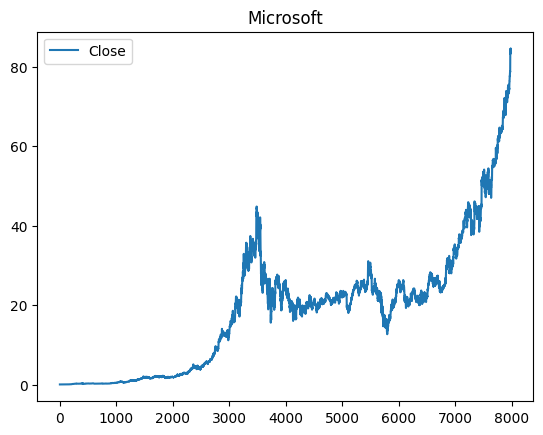

In [ ]:
df[['Close']].plot()
plt.title("Microsoft")
plt.show()

Text(0.5, 1.0, 'Apple Cumulative Returns')

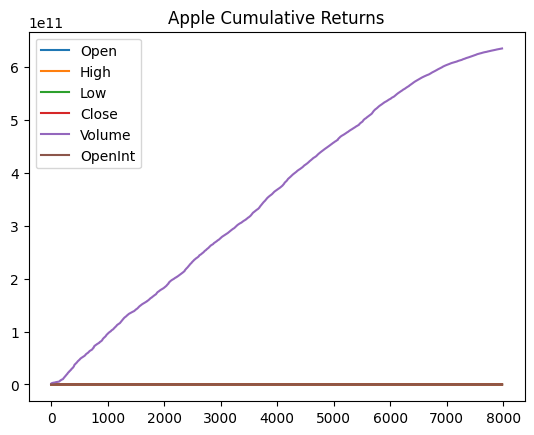

In [ ]:
dr = df.cumsum()
dr.plot()
plt.title('Apple Cumulative Returns')

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

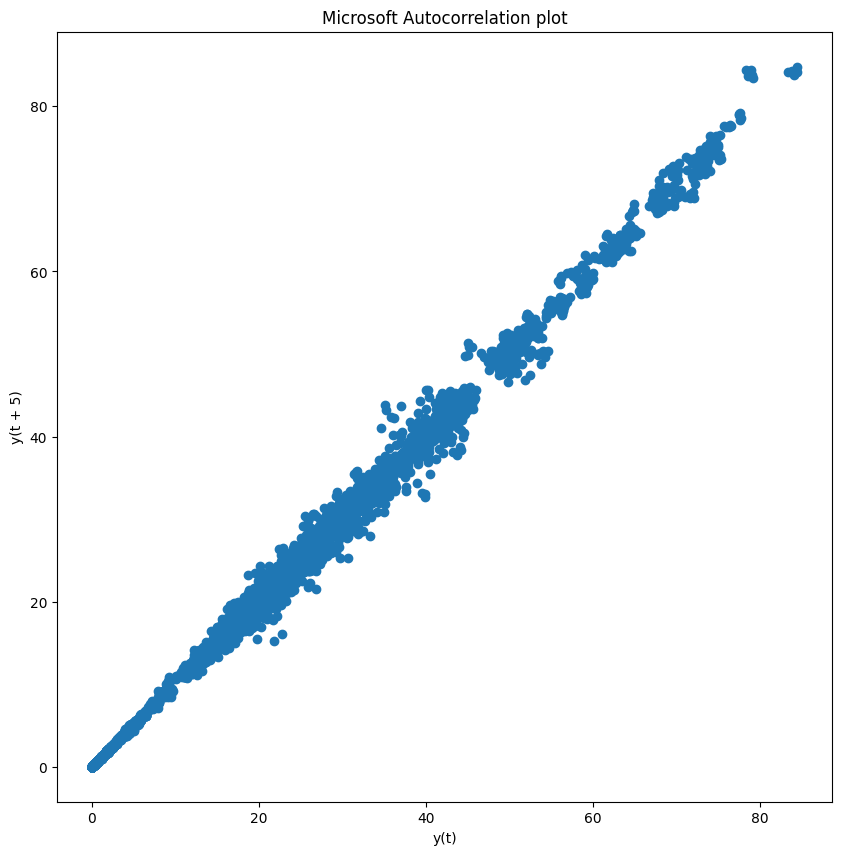

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Microsoft Autocorrelation plot')

In [ ]:
df['Date'][6100]

'2010-05-24'

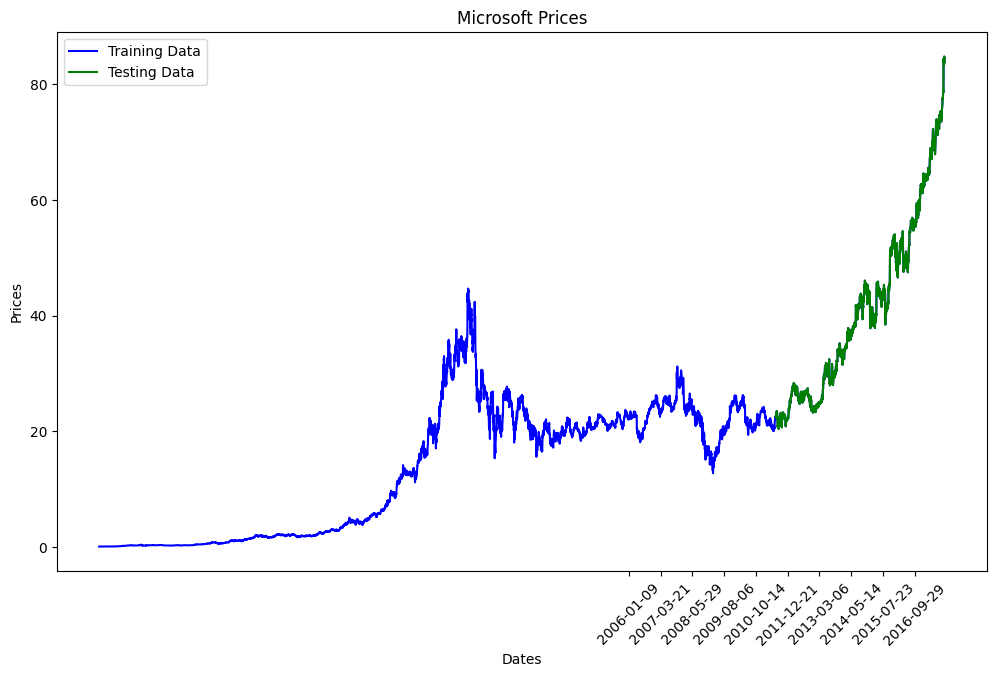

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(5000,8000, 300), df['Date'][5000:8000:300], rotation=45)
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.6 MB/s eta 0:00:00


In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.343
Symmetric mean absolute percentage error: 0.983


<ipython-input-49-4af632485e0e>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'green', color='blue', label='Training Data')


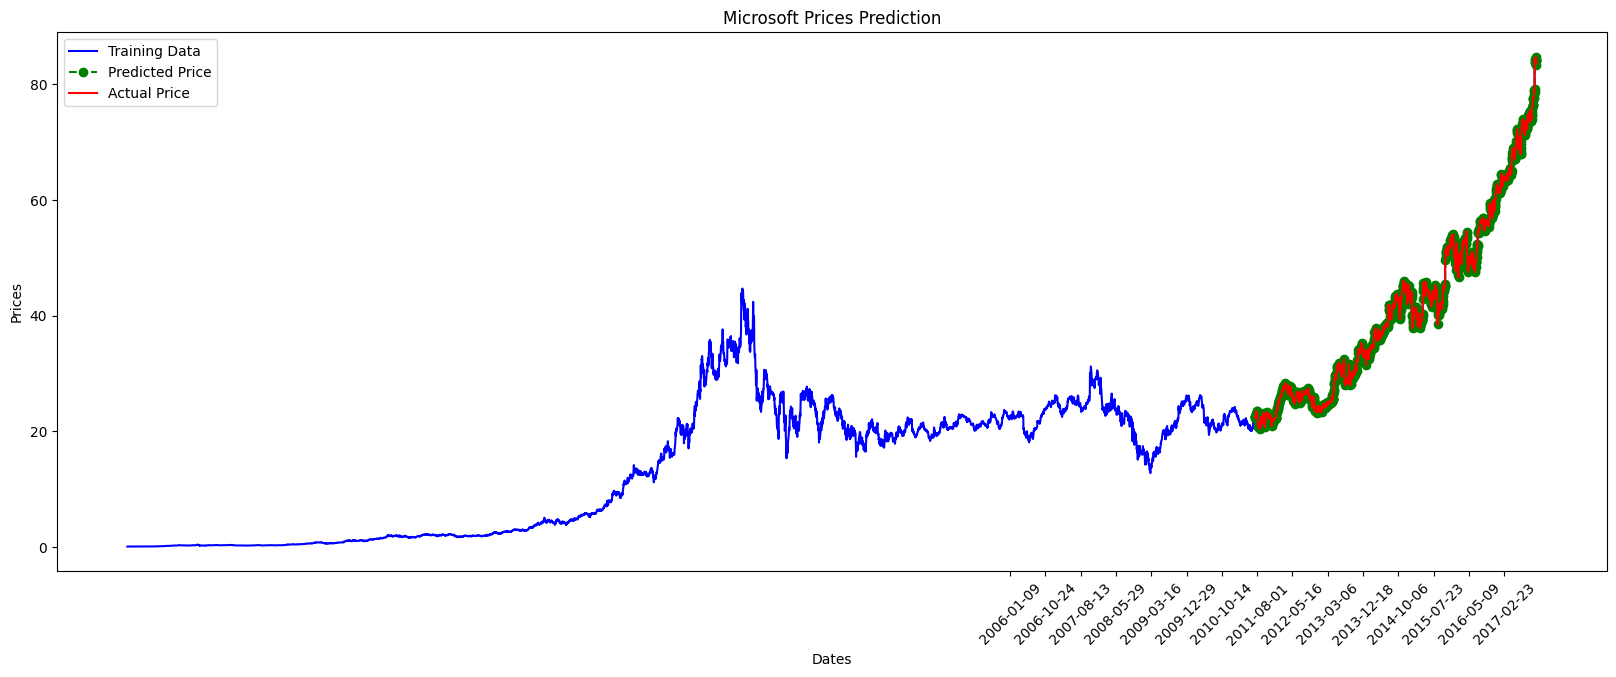

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(5000,8000, 200), df['Date'][5000:8000:200], rotation=45)
plt.legend()

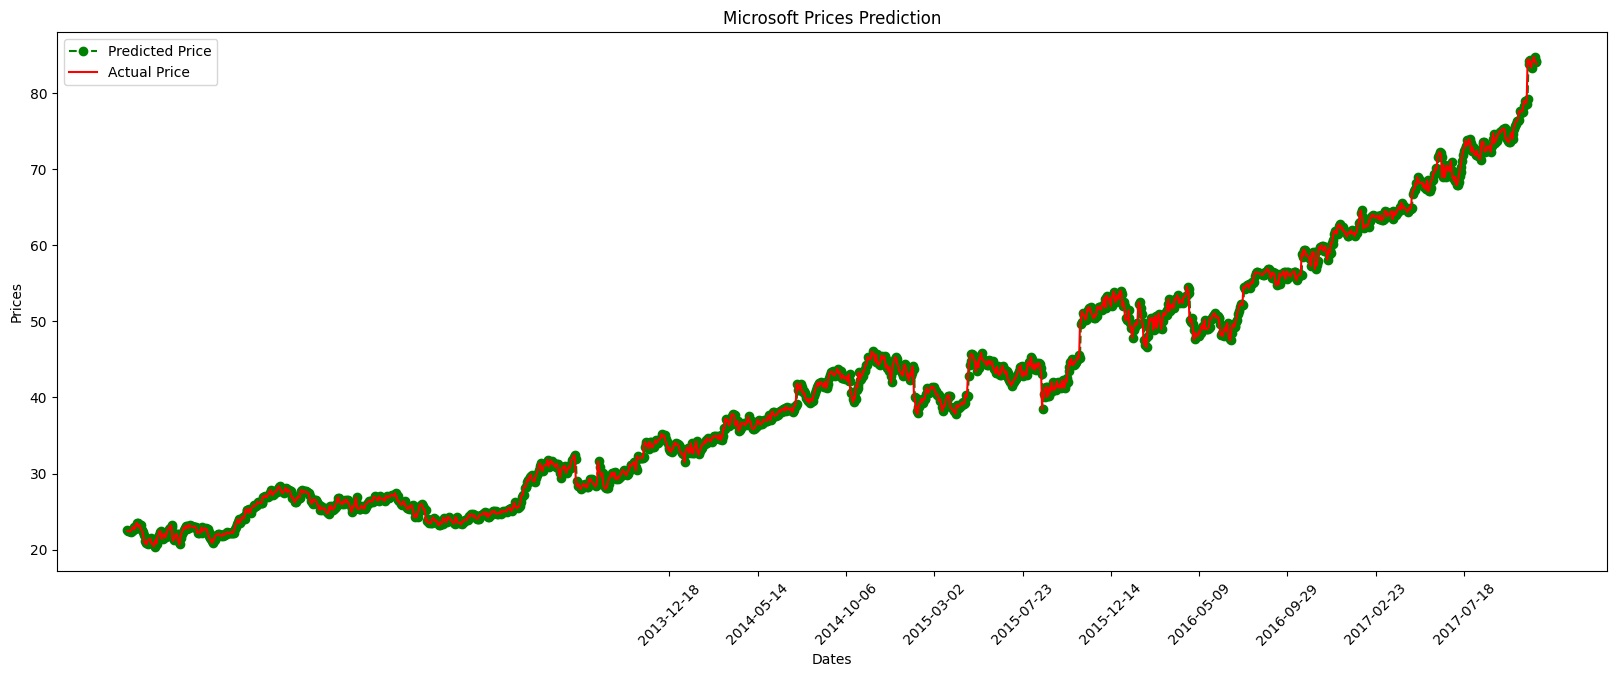

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(7000,8000, 100), df['Date'][7000:8000:100], rotation=45)
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()